In [16]:
# check if current path is not /home/chaodai/cdai/rescanner/analysis, then change to it and print the action
if (getwd() != "/home/chaodai/cdai/rescanner/analysis") {
  setwd("/home/chaodai/cdai/rescanner/analysis")
  print("change working directory to /home/chaodai/cdai/rescanner/analysis")
}
getwd()

[1] "change working directory to /home/chaodai/cdai/rescanner/analysis"


[1] "/project2/yangili1/cdai/rescanner/analysis"

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(glue))

In [17]:
ed.sites.f <- glue("../code/results/mRNA/YRI/BCFCall/RemoveVariants/NA19{c('095', '130', '160')}.tsv.gz")

In [18]:
ed.sites.f

../code/results/mRNA/YRI/BCFCall/RemoveVariants/NA19095.tsv.gz
../code/results/mRNA/YRI/BCFCall/RemoveVariants/NA19130.tsv.gz
../code/results/mRNA/YRI/BCFCall/RemoveVariants/NA19160.tsv.gz

In [19]:
ed.sites <- map(ed.sites.f, fread)

In [20]:
names(ed.sites) <- c("NA19095", "NA19130", "NA19160")

In [26]:
ed.sites$NA19095 %>% head

CHROM,POS,ID,REF,ALT,DP,AD_ref,AD_alt
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>
chr1,14542,chr1:14542:A:G,A,G,10,0,8
chr1,14574,chr1:14574:A:G,A,G,14,6,6
chr1,14590,chr1:14590:G:A,G,A,16,7,7
chr1,14653,chr1:14653:C:T,C,T,57,11,44
chr1,15820,chr1:15820:G:T,G,T,10,0,10
chr1,16495,chr1:16495:G:C,G,C,10,0,8


In [22]:
map(ed.sites, ~.x %>% dim)

$NA19095
[1] 7303    8

$NA19130
[1] 3223    8

$NA19160
[1] 2530    8

In [25]:
ed.sites <- map(ed.sites, ~.x[, ID := paste(CHROM, POS, REF, ALT, sep = ":")])

In [31]:
shared_3way <- reduce(map(ed.sites, ~.x$ID), intersect)

In [32]:
length(shared_3way)

[1] 976

In [36]:
dt  <- imap_dfr(ed.sites, ~.x[ID %in% shared_3way, ][, .(ID, DP, AD_ref, AD_alt, EL = AD_alt / DP, ds = .y)])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


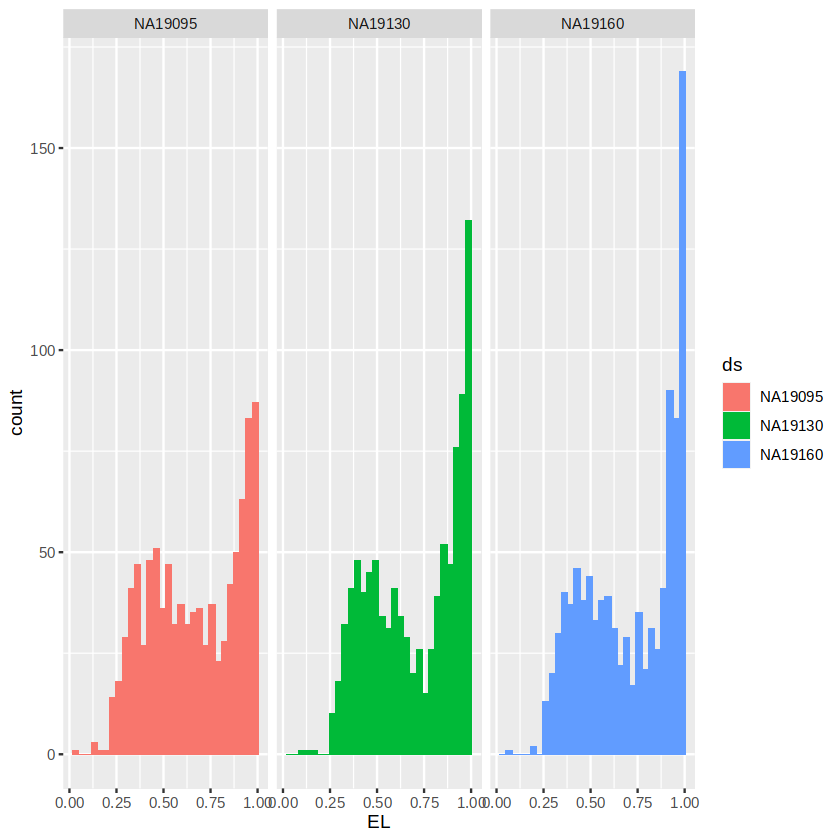

In [48]:
dt %>% 
    ggplot() + geom_histogram(aes(x = EL, fill = ds)) + facet_wrap(~ds, nrow = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


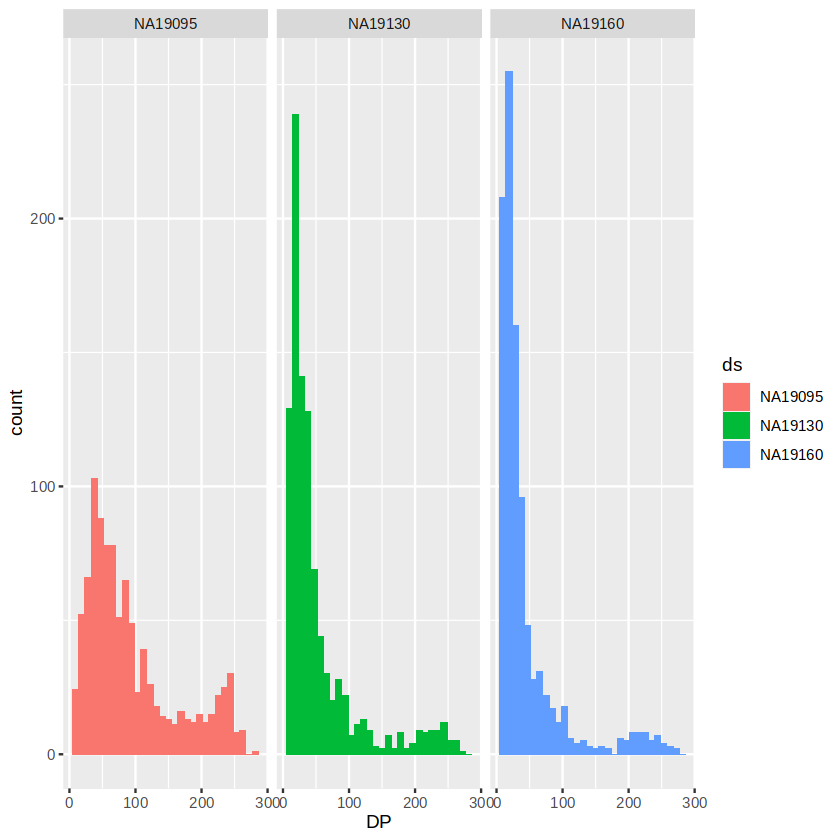

In [49]:
dt %>% 
    ggplot() + geom_histogram(aes(x = DP, fill = ds)) + facet_wrap(~ds, nrow = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


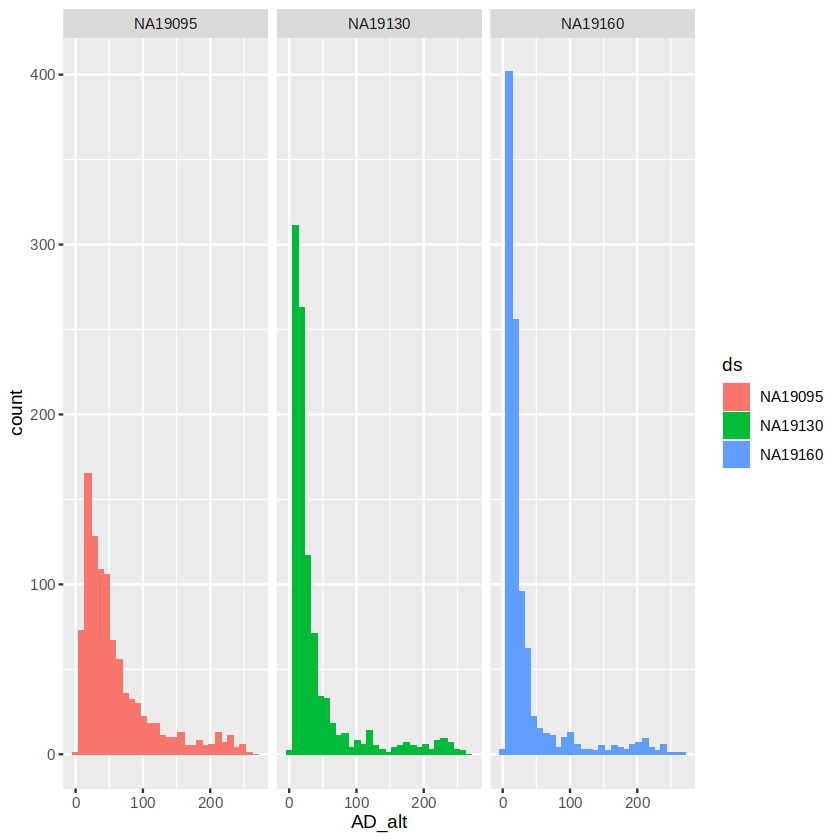

In [50]:
dt %>% 
    ggplot() + geom_histogram(aes(x = AD_alt, fill = ds)) + facet_wrap(~ds, nrow = 1)

In [44]:
dt2  <- imap_dfr(ed.sites, ~.x[, .(ID, DP, AD_ref, AD_alt, EL = AD_alt / DP, ds = .y)])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


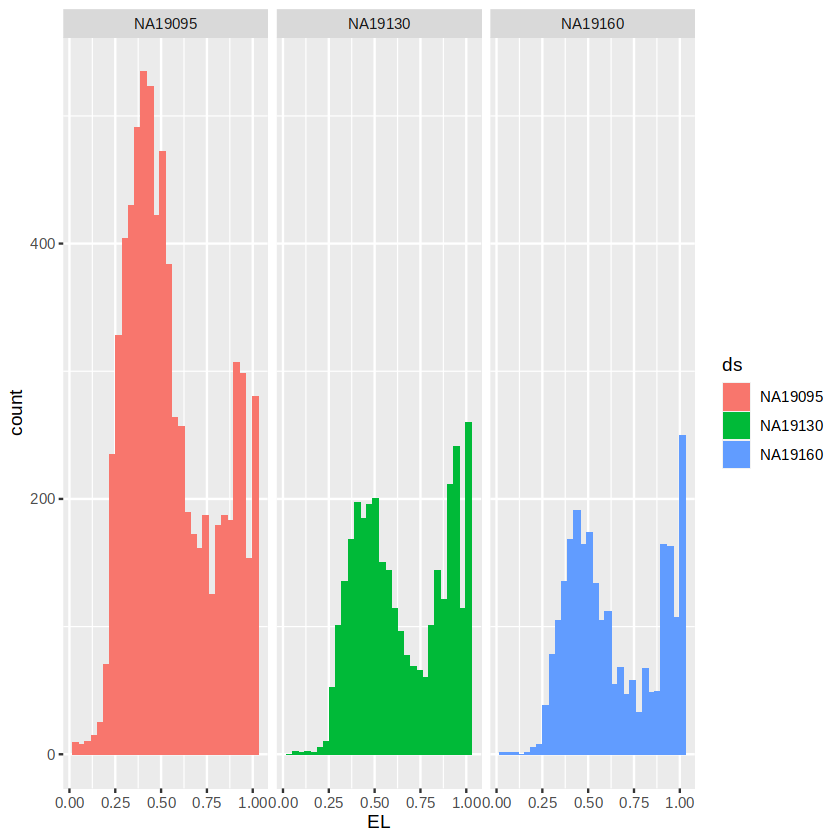

In [51]:
dt2 %>% 
    ggplot() + geom_histogram(aes(x = EL, fill = ds)) + facet_wrap(~ds, nrow = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


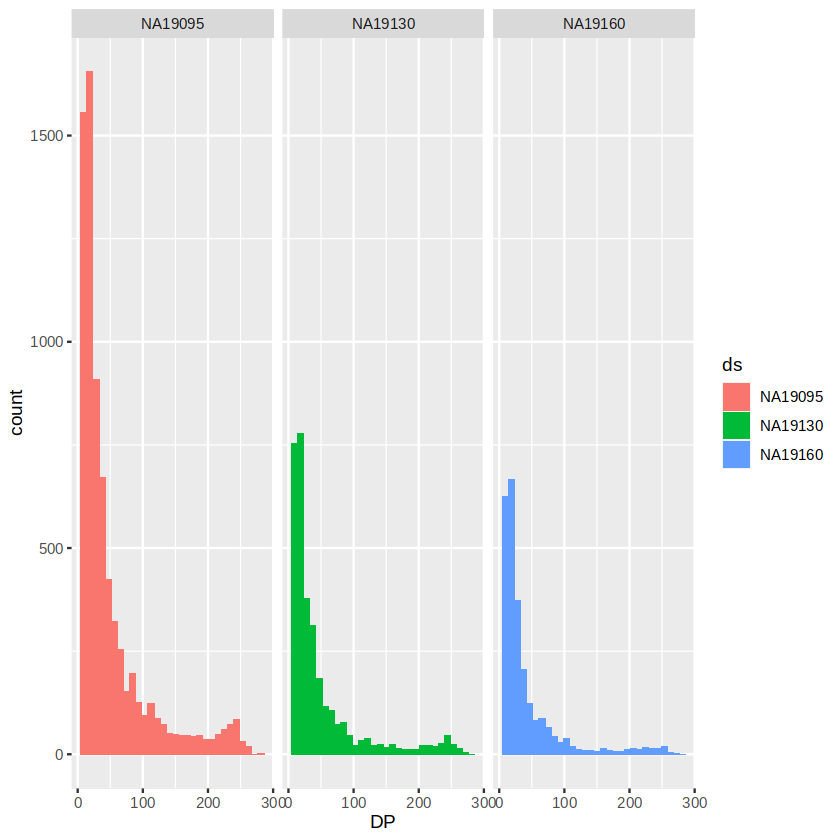

In [52]:
dt2 %>% 
    ggplot() + geom_histogram(aes(x = DP, fill = ds)) + facet_wrap(~ds, nrow = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


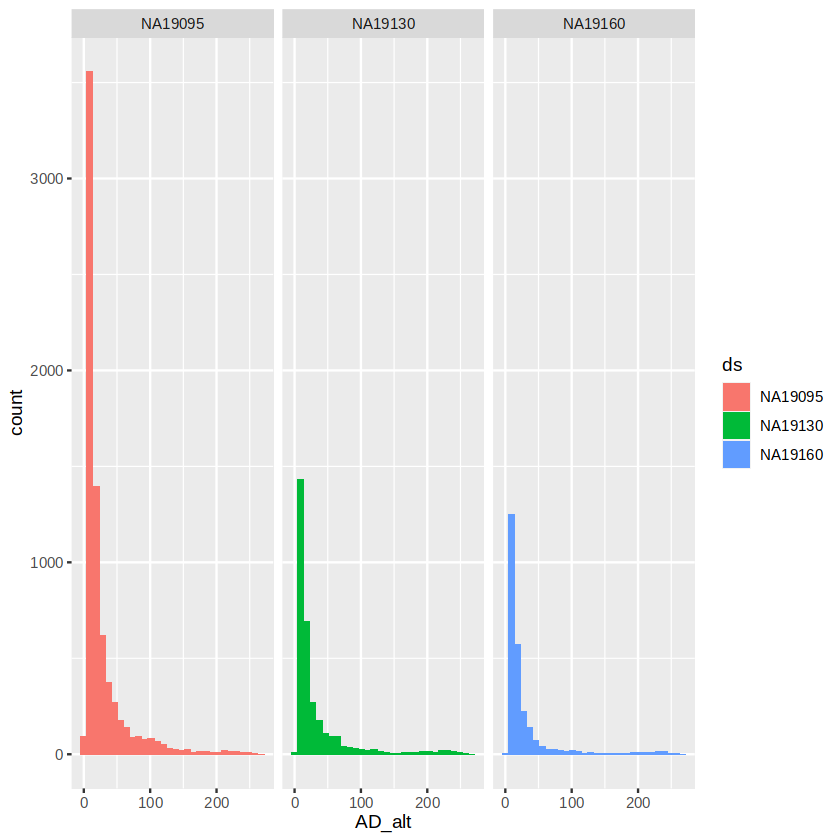

In [53]:
dt2 %>% 
    ggplot() + geom_histogram(aes(x = AD_alt, fill = ds)) + facet_wrap(~ds, nrow = 1)